## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [73]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2020-11-26 15:23:06--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2020-11-26 15:23:07--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc476916fc460d848360a967d57b.dl.dropboxusercontent.com/cd/0/inline/BD6N5kagKP4MVD_w-I9-KEL2PucK6jXMUeqDqCZIxNH2iZ-imVnnrkqZFqaSoA9Iza98-M2ayWWR852eqr-i9HxM10IB5UtynZFs87z0U3q_e_fiJjZ29CV7VMjrX1FPq0c/file# [following]
--2020-11-26 15:23:07--  https://uc476916fc460d848360a967d57b.dl.dropboxusercontent.com/cd/0/inline/BD6N5kagKP4MVD_w-I9-KEL2PucK6jXMUeqDqCZIxNH2iZ-imVnnrkqZFqaSoA9Iza98-M2ayWWR852eqr-i9HxM10IB5UtynZFs87

In [1]:
import numpy as np
import pandas as pd

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger than 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
#Question No.1

print("Question No.1",'\n',"-------------",'\n')

File="~/data/data_000637.txt"
data=pd.read_csv(File)
data
N = np.random.randint(10000,1310719)
data.iloc[10001:N , 0:6]
#Now we know put limitation for N, which is the number of rows we want Pandas to read the table. 



Question No.1 
 ------------- 



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
10001,1,0,47,3869200267,785,14
10002,1,0,63,3869200267,921,28
10003,1,0,64,3869200267,924,15
10004,1,0,7,3869200267,998,22
10005,1,0,8,3869200267,998,12
...,...,...,...,...,...,...
1113412,1,0,59,3869209793,137,11
1113413,1,0,60,3869209793,166,18
1113414,1,0,32,3869209793,164,23
1113415,1,0,59,3869209793,169,1


In [3]:
print("--------------------------------------------------------------------",'\n','\n')

-------------------------------------------------------------------- 
 



In [4]:
#Question No.2

print("Question No.1",'\n',"-------------",'\n')

data

Question No.1 
 ------------- 



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [5]:
x = np.random.randint(0,1310720)
data.loc[x,['ORBIT_CNT','BX_COUNTER']]

ORBIT_CNT     3869203179
BX_COUNTER           326
Name: 301676, dtype: int64

In [6]:
print("--------------------------------------------------------------------",'\n','\n')

-------------------------------------------------------------------- 
 



In [7]:
%time df=pd.read_csv('~/data/data_000637.txt')

CPU times: user 475 ms, sys: 101 ms, total: 575 ms
Wall time: 536 ms


In [ ]:
#Question No.3

import timeit
import pandas as pd
import numpy as np

df = pd.DataFrame(data)
def data_taking_time(df):
    t = 0
    for index in range(len(df)):
        t += df['HEAD'].iloc[index] + df['FPGA'].iloc[index] + df['TDC_CHANNEL'].iloc[index] + df['ORBIT_CNT'].iloc[index] + df['BX_COUNTER'].iloc[index] + df['TDC_MEAS'].iloc[index]
    return t

%timeit data_taking_time(df)

In [ ]:
#Question No.3_Second Solution

import timeit
import pandas as pd
import numpy as np

df = pd.DataFrame(data)
def data_taking_time(df):
    t = 0
    for index in range(len(df)):
        t += df.iloc[index]
    return t

%timeit data_taking_time(df)

In [8]:
print("--------------------------------------------------------------------",'\n','\n')

-------------------------------------------------------------------- 
 



In [9]:
#Question No.4

import pandas as pd
import datetime as dt

df = pd.DataFrame(data)
df.insert(6, "Time_Prime(ns)", [i for i in range(1310720)])
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns)
0,1,0,123,3869200167,2374,26,0
1,1,0,124,3869200167,2374,27,1
2,1,0,63,3869200167,2553,28,2
3,1,0,64,3869200167,2558,19,3
4,1,0,64,3869200167,2760,25,4
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,1310715
1310716,1,1,4,3869211171,763,11,1310716
1310717,1,0,64,3869211171,764,0,1310717
1310718,1,0,139,3869211171,769,0,1310718


In [10]:
#Question No.4_Second Solution_regarding the answer of the data acauisition in Question No.3

t3 = (10**9)*(8*60+37)/1310718
df['Time(ns)'] = np.arange(len(df))*t3
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
0,1,0,123,3869200167,2374,26,0,0.000000e+00
1,1,0,124,3869200167,2374,27,1,3.944403e+05
2,1,0,63,3869200167,2553,28,2,7.888806e+05
3,1,0,64,3869200167,2558,19,3,1.183321e+06
4,1,0,64,3869200167,2760,25,4,1.577761e+06
...,...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,1310715,5.169988e+11
1310716,1,1,4,3869211171,763,11,1310716,5.169992e+11
1310717,1,0,64,3869211171,764,0,1310717,5.169996e+11
1310718,1,0,139,3869211171,769,0,1310718,5.170000e+11


In [11]:
print("--------------------------------------------------------------------",'\n','\n')

-------------------------------------------------------------------- 
 



In [12]:
#Question No.5

df['HEAD'] = np.random.randint(0,2, size=len(df))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
0,0,0,123,3869200167,2374,26,0,0.000000e+00
1,1,0,124,3869200167,2374,27,1,3.944403e+05
2,0,0,63,3869200167,2553,28,2,7.888806e+05
3,1,0,64,3869200167,2558,19,3,1.183321e+06
4,0,0,64,3869200167,2760,25,4,1.577761e+06
...,...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,1310715,5.169988e+11
1310716,0,1,4,3869211171,763,11,1310716,5.169992e+11
1310717,1,0,64,3869211171,764,0,1310717,5.169996e+11
1310718,0,0,139,3869211171,769,0,1310718,5.170000e+11


In [13]:
print("--------------------------------------------------------------------",'\n','\n')

-------------------------------------------------------------------- 
 



In [14]:
#Question No.6

df_new_1 = df[(df['HEAD'].isin(['1']))]
df_new_1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
1,1,0,124,3869200167,2374,27,1,3.944403e+05
3,1,0,64,3869200167,2558,19,3,1.183321e+06
9,1,0,60,3869200167,2788,7,9,3.549963e+06
12,1,1,6,3869200167,2792,18,12,4.733284e+06
13,1,0,36,3869200167,2791,23,13,5.127724e+06
...,...,...,...,...,...,...,...,...
1310711,1,1,39,3869211171,430,0,1310711,5.169972e+11
1310712,1,1,35,3869211171,429,4,1310712,5.169976e+11
1310714,1,0,60,3869211171,762,2,1310714,5.169984e+11
1310715,1,0,62,3869211171,762,14,1310715,5.169988e+11


In [15]:
print("--------------------------------------------------------------------",'\n','\n')

-------------------------------------------------------------------- 
 



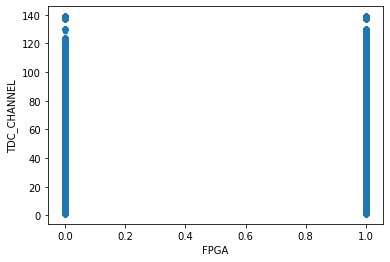

In [32]:
#Question No.7

df.plot(x ='FPGA', y ='TDC_CHANNEL', kind = 'scatter')


In [80]:
print("--------------------------------------------------------------------",'\n','\n')

-------------------------------------------------------------------- 
 



In [68]:
#Question No.8

Z = df[["BX_COUNTER","TDC_CHANNEL","ORBIT_CNT","TDC_MEAS","HEAD","FPGA"]]
Z.max()

BX_COUNTER           3563
TDC_CHANNEL           139
ORBIT_CNT      3869211171
TDC_MEAS               29
HEAD                    1
FPGA                    1
dtype: int64

In [82]:
df.nlargest(3, ["BX_COUNTER"])

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
2893,1,0,45,3869200195,3563,29,2893,1.141116e+09
4073,1,0,122,3869200207,3563,22,4073,1.606555e+09
4461,0,0,124,3869200211,3563,6,4461,1.759598e+09


In [83]:
df.nlargest(3, ["TDC_CHANNEL"])

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
7,0,0,139,3869200167,2776,0,7,2.761082e+06
15,1,1,139,3869200167,2797,0,15,5.916604e+06
30,0,0,139,3869200167,3085,0,30,1.183321e+07


In [78]:
df.nlargest(3, ["ORBIT_CNT"])

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
1310698,0,0,60,3869211171,9,9,1310698,5.169921e+11
1310699,0,0,25,3869211171,11,28,1310699,5.169925e+11
1310700,1,0,28,3869211171,9,26,1310700,5.169929e+11


In [79]:
df.nlargest(3, ["TDC_MEAS"])

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
83,1,0,45,3869200168,1495,29,83,3.273854e+07
84,1,0,48,3869200168,1498,29,84,3.313299e+07
87,1,0,46,3869200168,1499,29,87,3.431631e+07


In [87]:
df.nlargest(3, ["TDC_CHANNEL", "BX_COUNTER"])

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
18454,0,0,139,3869200352,3563,0,18454,7.279001e+09
100424,1,0,139,3869201165,3563,0,100424,3.961127e+10
103314,0,0,139,3869201194,3563,0,103314,4.075121e+10


In [85]:
df.sort_values(["TDC_CHANNEL", "BX_COUNTER"], ascending=[False, False])

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
18454,0,0,139,3869200352,3563,0,18454,7.279001e+09
100424,1,0,139,3869201165,3563,0,100424,3.961127e+10
103314,0,0,139,3869201194,3563,0,103314,4.075121e+10
161391,0,1,139,3869201773,3563,0,161391,6.365911e+10
199556,0,0,139,3869202152,3563,0,199556,7.871293e+10
...,...,...,...,...,...,...,...,...
979351,0,1,1,3869208883,0,17,979351,3.862955e+11
991072,1,1,1,3869208956,0,11,991072,3.909187e+11
1142267,1,1,1,3869210003,0,24,1142267,4.505561e+11
1152722,0,1,1,3869210076,0,20,1152722,4.546800e+11


In [81]:
print("--------------------------------------------------------------------",'\n','\n')

-------------------------------------------------------------------- 
 



In [181]:
#Question No.9

df[df["TDC_CHANNEL"]==139].count()

HEAD              108059
FPGA              108059
TDC_CHANNEL       108059
ORBIT_CNT         108059
BX_COUNTER        108059
TDC_MEAS          108059
Time_Prime(ns)    108059
Time(ns)          108059
dtype: int64

In [180]:
#Question No.9_Second solution

(df['TDC_CHANNEL']==139).sum()

108059

In [179]:
#Question No.9_Third solution

len(df[df["TDC_CHANNEL"]==139])

108059

In [178]:
#Question No.9_Fourth solution

(df.TDC_CHANNEL == 139).sum()

108059

In [177]:
#Question No.9_Fifth solution

df.loc[df.TDC_CHANNEL==139,"TDC_CHANNEL"].count()

108059

In [176]:
#Question No.9_Sixth solution

result = df.groupby('TDC_CHANNEL')['ORBIT_CNT'].nunique()
print(result)

TDC_CHANNEL
1      10023
2      10304
3       9446
4       9967
5       8249
       ...  
129       35
130       67
137       36
138       36
139    10976
Name: ORBIT_CNT, Length: 133, dtype: int64


In [175]:
#Question No.9_Seventh solution

df["ORBIT_CNT"].value_counts(bins=10000)

(3869208495.928, 3869208497.028]    467
(3869208923.983, 3869208925.084]    467
(3869210709.932, 3869210711.033]    463
(3869210468.945, 3869210470.045]    447
(3869208583.96, 3869208585.06]      438
                                   ... 
(3869204141.645, 3869204142.745]      1
(3869206179.586, 3869206180.686]      1
(3869201572.211, 3869201573.311]      0
(3869202169.728, 3869202170.828]      0
(3869206209.296, 3869206210.397]      0
Name: ORBIT_CNT, Length: 10000, dtype: int64

In [174]:
#Question No.9_Eighth solution

df.groupby('ORBIT_CNT').count()

,HEAD,FPGA,TDC_CHANNEL,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
ORBIT_CNT,,,,,,,
3869200167,43,43,43,43,43,43,43
3869200168,85,85,85,85,85,85,85
3869200169,127,127,127,127,127,127,127
3869200170,98,98,98,98,98,98,98
3869200171,109,109,109,109,109,109,109
...,...,...,...,...,...,...,...
3869211167,208,208,208,208,208,208,208
3869211168,109,109,109,109,109,109,109
3869211169,191,191,191,191,191,191,191


In [173]:
#Question No.9_Ninth solution

df.groupby('TDC_CHANNEL').count()

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_Prime(ns),Time(ns)
TDC_CHANNEL,,,,,,,
1,29653,29653,29653,29653,29653,29653,29653
2,34271,34271,34271,34271,34271,34271,34271
3,23463,23463,23463,23463,23463,23463,23463
4,28755,28755,28755,28755,28755,28755,28755
5,16435,16435,16435,16435,16435,16435,16435
...,...,...,...,...,...,...,...
129,37,37,37,37,37,37,37
130,71,71,71,71,71,71,71
137,68,68,68,68,68,68,68


In [172]:
#Question No.9_Tenth solution

result = df.groupby('ORBIT_CNT')['TDC_CHANNEL'].nunique()
print(result)

ORBIT_CNT
3869200167    22
3869200168    31
3869200169    47
3869200170    52
3869200171    48
              ..
3869211167    71
3869211168    50
3869211169    65
3869211170    63
3869211171    17
Name: TDC_CHANNEL, Length: 11001, dtype: int64
